# SBA National Loan Analysis

# Modeling - Part 2 - Random Forest

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, matthews_corrcoef, confusion_matrix

from library.preprocessing import processing_pipeline
from library.modeling import (createModel, createClassificationMetrics, 
                             runGridSearchAnalysis, createConfusionMatrix, createFeatureImportanceChart)

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## 2. Previewing Data

In [3]:
sba_loans = pd.read_csv('./../data/processed/sba_national_processed_final.csv')

In [4]:
sba_loans.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv,NAICS_sectors,unemployment_rate,gdp_growth,gdp_annual_change,inflation_rate,inf_rate_annual_chg,NewExist_existing_business,NewExist_new_business,UrbanRural_rural,UrbanRural_urban,isFranchise_not_franchise,RevLineCr_v2_N,RevLineCr_v2_Y,LowDoc_v2_N,LowDoc_v2_Y,MIS_Status_v2_default,state_top10
0,84,4,0,0,60000.0,60000.0,48000.0,45,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
1,60,2,0,0,40000.0,40000.0,32000.0,72,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
2,180,7,0,0,287000.0,287000.0,215250.0,62,3.5,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,0
3,60,2,0,0,35000.0,35000.0,28000.0,0,4.1,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,0,1,0,0
4,240,14,7,7,229000.0,229000.0,229000.0,0,4.8,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,1


In [5]:
target = 'MIS_Status_v2_default'
features = sba_loans.drop(columns='MIS_Status_v2_default', axis=1).columns

## 3. Random Forest with Standard Scalar

In [6]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = processing_pipeline(sba_loans, target)

### A. Simple Random Forest Model

In [7]:
rfc_ss_mod1 = RandomForestClassifier(random_state=42)
y_pred = createModel(rfc_ss_mod1, X_train_ss, y_train_ss, X_test_ss)

### B. Evaluation Metrics

In [8]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_ss)

**Accuracy Score**

In [9]:
print(acc_score)

0.9383977921102159


**Classification Report**

In [10]:
print(cr)

              precision    recall  f1-score   support

        paid       0.98      0.95      0.96    227409
     default       0.76      0.87      0.81     41445

    accuracy                           0.94    268854
   macro avg       0.87      0.91      0.89    268854
weighted avg       0.94      0.94      0.94    268854



**F1 Score**

In [11]:
print(f1)

0.8127487337192474


**Matthew's Correlation Coefficient**

In [12]:
print(mcc)

0.7782586200531028


### C. Finding Best Random Forest Model with Standard Scaler

In [13]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, None],
    'max_features': ['auto', 'log2']
}

In [14]:
rfc = RandomForestClassifier(random_state=42)
rfc_ss_best_params, y_pred = runGridSearchAnalysis(rfc, param_grid, X_train_ss, y_train_ss, X_test_ss)

In [15]:
print(rfc_ss_best_params)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}


In [16]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_ss)
print('Accuracy Score: {}'.format(acc_score))
print('Matthew\'s Correlation Coefficient: {}'.format(mcc))
print('F1 Score: {}'.format(f1))
print('Classification Report: \n{}'.format(cr))

Accuracy Score: 0.9378584659331831
Matthew's Correlation Coefficient: 0.7763052183674407
F1 Score: 0.8111328412032693
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.95      0.96    227398
     default       0.76      0.87      0.81     41456

    accuracy                           0.94    268854
   macro avg       0.87      0.91      0.89    268854
weighted avg       0.94      0.94      0.94    268854



### D. Confusion Matrix

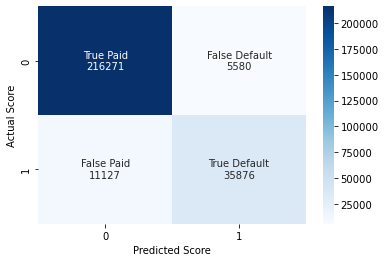

In [17]:
rfc_ss_fp = createConfusionMatrix(y_test_ss, y_pred)

### E. Feature Importance with Best Params

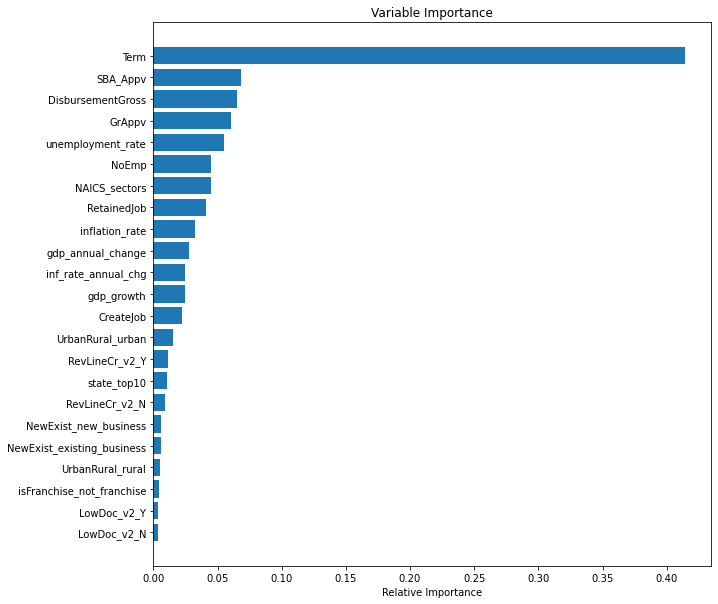

In [30]:
createFeatureImportanceChart(RandomForestClassifier, rfc_ss_best_params, features,
                             X_train_ss, y_train_ss)

## 4. Random Forest Classification with Robust Scaler

In [20]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = processing_pipeline(sba_loans, target, scaler='Robust')

### A. Simple Random Forest Model

In [21]:
rfc_rs_mod1 = RandomForestClassifier(random_state=42)
y_pred = createModel(rfc_rs_mod1, X_train_rs, y_train_rs, X_test_rs)

### B. Evaluation Metrics

In [22]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_rs)

**Accuracy Score**

In [23]:
print(acc_score)

0.9384684624368617


**Classification Report**

In [24]:
print(cr)

              precision    recall  f1-score   support

        paid       0.98      0.95      0.96    227390
     default       0.77      0.87      0.81     41464

    accuracy                           0.94    268854
   macro avg       0.87      0.91      0.89    268854
weighted avg       0.94      0.94      0.94    268854



**F1 Score**

In [25]:
print(f1)

0.813003718900833


**Matthew's Correlation Coefficient**

In [26]:
print(mcc)

0.7785379045891734


### C. Finding Best Random Forest Model with Robust Scaler

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, None],
    'max_features': ['auto', 'log2']
}

In [31]:
rfc = RandomForestClassifier(random_state=42)
rfc_rs_best_params, y_pred = runGridSearchAnalysis(rfc, param_grid, X_train_rs, y_train_rs, X_test_rs)

In [32]:
print(rfc_rs_best_params)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}


In [33]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_rs)
print('Accuracy Score: {}'.format(acc_score))
print('Matthew\'s Correlation Coefficient: {}'.format(mcc))
print('F1 Score: {}'.format(f1))
print('Classification Report: \n{}'.format(cr))

Accuracy Score: 0.9379179777872005
Matthew's Correlation Coefficient: 0.776554667224084
F1 Score: 0.8113734220846
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.95      0.96    227370
     default       0.76      0.87      0.81     41484

    accuracy                           0.94    268854
   macro avg       0.87      0.91      0.89    268854
weighted avg       0.94      0.94      0.94    268854



### D. Confusion Matrix

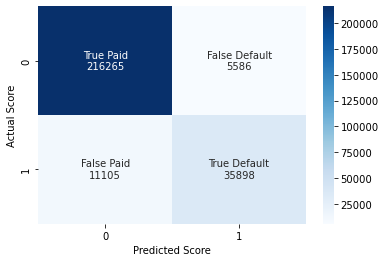

In [34]:
rfc_rs_fp = createConfusionMatrix(y_test_rs, y_pred)

### E. Feature Importance

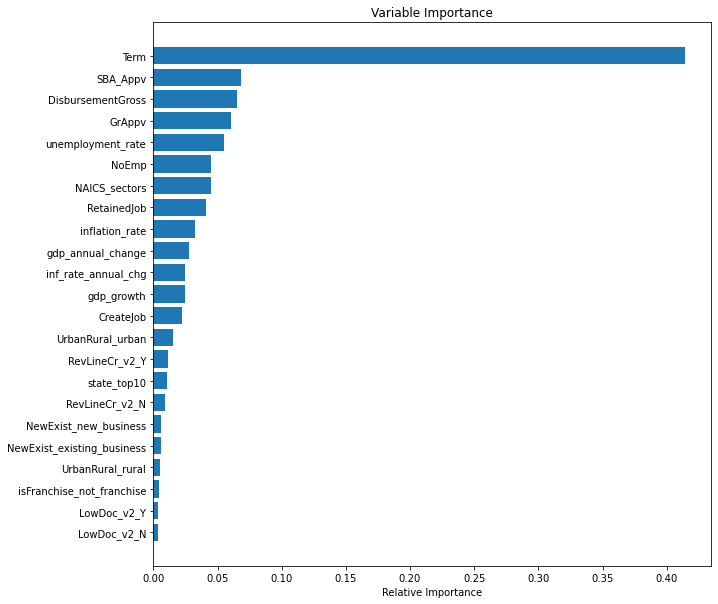

In [35]:
createFeatureImportanceChart(RandomForestClassifier, rfc_rs_best_params, features,
                             X_train_rs, y_train_rs)

## 5. Best Random Forest Model

In [36]:
if rfc_ss_fp > rfc_rs_fp:
    print('Best Logistic Regression Model Params: {}'.format(rfc_rs_best_params))
    print('Best Scaler: Robust Scaler')
else:
    print('Best Logistic Regression Model Params: {}'.format(rfc_ss_best_params))
    print('Best Scaler: Standard Scaler') 

Best Logistic Regression Model Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}
Best Scaler: Robust Scaler
